**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from sklearn import metrics
from scipy import stats
%load_ext pycodestyle_magic

In [2]:
# %%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        if self.algorithm == 'kd_tree':
            self._X = KDTree(X)
        else:
            self._X = X
        if not isinstance(y.dtype, int):
            self._y = np.array(y, dtype=int)
        else:
            self._y = y
        self.classes = np.unique(y)
        return self

    def find_neighbors(self, X):
        if isinstance(self._X, KDTree):
            knn_dist, knn_ind = self._X.query(X, k=self.n_neighbors)
        else:
            dist = metrics.pairwise_distances(X, self._X)
            tmp_ind = np.arange(dist.shape[0])[:, None]
            knn_ind = np.argpartition(dist,
                                      self.n_neighbors,
                                      axis=1)[:, :self.n_neighbors]
            knn_dist = np.array(dist[tmp_ind, knn_ind])
            knn_ind = knn_ind[tmp_ind, np.argsort(knn_dist)]
        return knn_ind

    def predict(self, X):
        knn_ind = self.find_neighbors(X)
        y_pred, _ = stats.mode(np.array(self._y[knn_ind]), axis=1)
        return self.classes[y_pred].ravel()

    def predict_proba(self, X):
        knn_ind = self.find_neighbors(X)
        test_ind = X.shape[0]
        classes_ind = self.classes.shape[0]
        y_proba = np.zeros((test_ind, classes_ind), dtype=int)
        for i in range(test_ind):
            y_proba[i] += np.bincount(self._y[knn_ind][i],
                                      minlength=classes_ind)
        return y_proba / self.n_neighbors

    def score(self, X, y):
        y_proba = self.predict(X)
        return np.mean(y_proba == y)

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 1.21 ms, sys: 853 µs, total: 2.06 ms
Wall time: 1.32 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 254 µs, sys: 146 µs, total: 400 µs
Wall time: 300 µs


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [8]:
%time clf.predict(X_test)

CPU times: user 6.44 ms, sys: 3.72 ms, total: 10.2 ms
Wall time: 7.48 ms


array([0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 2])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 1.66 ms, sys: 845 µs, total: 2.5 ms
Wall time: 1.84 ms


array([0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 2])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.96 ms, sys: 1.03 ms, total: 2.99 ms
Wall time: 2.2 ms


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.33 ms, sys: 985 µs, total: 2.31 ms
Wall time: 1.3 ms


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

Наилучшее число n_neighbor: 12
Наилучший score: 0.9800000000000001


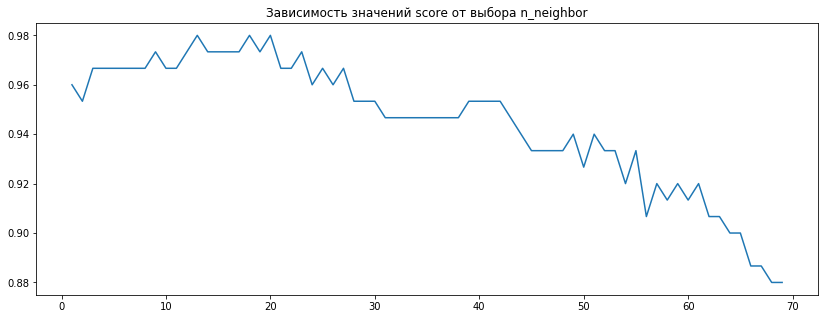

In [14]:
# %%pycodestyle
# размер тестовой выборки 10% от всех данных (аналогично Заданию 1)

from sklearn.model_selection import cross_val_score

n_neighbors = range(1, 70)
mean_score = [0]*len(n_neighbors)

for nn in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=nn)
    scores = cross_val_score(knn, iris.data, iris.target, cv=10)
    mean_score[nn-1] = scores.mean()

n_optimal = np.array(mean_score).argmax()
score_optimal = mean_score[n_optimal]
print("Наилучшее число n_neighbor: {0}\nНаилучший score: {1}"
      .format(n_optimal, score_optimal))

plt.figure(figsize=(14, 5))
ax = plt.subplot(111)
ax.set_title('Зависимость значений score от выбора n_neighbor')
ax.plot(n_neighbors, mean_score)
plt.show()

**MNIST**

In [15]:
# mnist = fetch_mldata('MNIST original')
mnist = fetch_openml('mnist_784')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 198 ms, sys: 4.85 ms, total: 203 ms
Wall time: 201 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 72.7 ms, sys: 2.19 ms, total: 74.9 ms
Wall time: 73.4 ms


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [20]:
%time clf.predict(X_test)

CPU times: user 6.17 s, sys: 449 ms, total: 6.62 s
Wall time: 3.87 s


array(['8', '0', '7', '2', '1', '3', '9', '8', '0', '0', '2', '0', '6',
       '5', '8', '5', '3', '7', '6', '9', '1', '7', '1', '0', '5', '9',
       '4', '4', '8', '8', '5', '2', '4', '6', '6', '1', '3', '3', '1',
       '3', '2', '9', '6', '3', '1', '2', '9', '2', '7', '3', '2', '3',
       '1', '5', '8', '6', '4', '8', '1', '1', '6', '9', '9', '5', '4',
       '4', '4', '6', '0', '1', '3', '4', '1', '3', '0', '4', '4', '5',
       '7', '6', '2', '3', '3', '4', '1', '7', '4', '5', '3', '4', '5',
       '0', '7', '9', '5', '1', '9', '9', '3', '6', '8', '7', '7', '7',
       '5', '8', '6', '5', '1', '7', '4', '1', '2', '0', '2', '1', '1',
       '3', '2', '9', '5', '3', '2', '1', '0', '0', '0', '4', '7', '8',
       '9', '7', '4', '7', '3', '9', '3', '1', '0', '9', '6', '6', '8',
       '7', '4', '8', '6', '7', '9', '3', '5', '1', '7', '4', '1', '9',
       '8', '0', '8', '2', '8', '1', '7', '7', '8', '7', '2', '2', '4',
       '9', '0', '4', '0', '2', '6', '2', '4', '8', '3', '7', '4

In [21]:
%time my_clf.predict(X_test)

CPU times: user 6.44 s, sys: 449 ms, total: 6.89 s
Wall time: 3.98 s


array(['8', '0', '7', '2', '1', '3', '9', '8', '0', '0', '2', '0', '6',
       '5', '8', '5', '3', '7', '6', '9', '1', '7', '1', '0', '5', '9',
       '4', '4', '8', '8', '5', '2', '4', '6', '6', '1', '3', '3', '1',
       '3', '2', '9', '6', '3', '1', '2', '9', '2', '7', '3', '2', '3',
       '1', '5', '8', '6', '4', '8', '1', '1', '6', '9', '9', '5', '4',
       '4', '4', '6', '0', '1', '3', '4', '1', '3', '0', '4', '4', '5',
       '7', '6', '2', '3', '3', '4', '1', '7', '4', '5', '3', '4', '5',
       '0', '7', '9', '5', '1', '9', '9', '3', '6', '8', '7', '7', '7',
       '5', '8', '6', '5', '1', '7', '4', '1', '2', '0', '2', '1', '1',
       '3', '2', '9', '5', '3', '2', '1', '0', '0', '0', '4', '7', '8',
       '9', '7', '4', '7', '3', '9', '3', '1', '0', '9', '6', '6', '8',
       '7', '4', '8', '6', '7', '9', '3', '5', '1', '7', '4', '1', '9',
       '8', '0', '8', '2', '8', '1', '7', '7', '8', '7', '2', '2', '4',
       '9', '0', '4', '0', '2', '6', '2', '4', '8', '3', '7', '4

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 5.61 s, sys: 443 ms, total: 6.05 s
Wall time: 3.6 s


array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 6.09 s, sys: 436 ms, total: 6.53 s
Wall time: 3.78 s


array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [24]:
clf.score(X_test, y_test)

0.9714285714285714

In [25]:
my_clf.score(X_test, y_test)

0.9714285714285714

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 1min 13s, sys: 762 ms, total: 1min 14s
Wall time: 1min 14s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1min 17s, sys: 1.8 s, total: 1min 19s
Wall time: 1min 20s


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [30]:
%time clf.predict(X_test)

CPU times: user 1min 26s, sys: 532 ms, total: 1min 27s
Wall time: 1min 27s


array(['1', '4', '6', '0', '3', '5', '0', '9', '7', '3', '6', '4', '6',
       '1', '9', '1', '9', '3', '3', '6', '9', '6', '1', '6', '3', '7',
       '3', '8', '0', '2', '1', '3', '2', '5', '1', '1', '7', '8', '1',
       '1', '3', '1', '6', '1', '1', '4', '3', '4', '2', '2', '8', '6',
       '2', '4', '8', '4', '7', '4', '5', '3', '7', '3', '3', '3', '7',
       '1', '2', '6', '4', '0', '5', '4', '7', '0', '1', '9', '5', '5',
       '3', '5', '4', '5', '5', '2', '5', '1', '2', '4', '4', '3', '1',
       '5', '2', '2', '2', '8', '7', '7', '6', '4', '1', '3', '9', '5',
       '4', '3', '2', '7', '1', '2', '7', '6', '1', '6', '6', '8', '8',
       '9', '3', '9', '6', '3', '6', '2', '9', '5', '6', '9', '9', '3',
       '0', '8', '7', '9', '2', '7', '4', '3', '8', '3', '6', '9', '8',
       '3', '8', '6', '5', '5', '8', '0', '3', '8', '0', '6', '2', '0',
       '6', '4', '0', '7', '0', '5', '6', '5', '1', '6', '3', '2', '1',
       '6', '4', '5', '1', '8', '2', '5', '9', '3', '0', '3', '9

In [31]:
%time my_clf.predict(X_test)

CPU times: user 1min 10s, sys: 457 ms, total: 1min 11s
Wall time: 1min 11s


array(['1', '4', '6', '0', '3', '5', '0', '9', '7', '3', '6', '4', '6',
       '1', '9', '1', '9', '3', '3', '6', '9', '6', '1', '6', '3', '7',
       '3', '8', '0', '2', '1', '3', '2', '5', '1', '1', '7', '8', '1',
       '1', '3', '1', '6', '1', '1', '4', '3', '4', '2', '2', '8', '6',
       '2', '4', '8', '4', '7', '4', '5', '3', '7', '3', '3', '3', '7',
       '1', '2', '6', '4', '0', '5', '4', '7', '0', '1', '9', '5', '5',
       '3', '5', '4', '5', '5', '2', '5', '1', '2', '4', '4', '3', '1',
       '5', '2', '2', '2', '8', '7', '7', '6', '4', '1', '3', '9', '5',
       '4', '3', '2', '7', '1', '2', '7', '6', '1', '6', '6', '8', '8',
       '9', '3', '9', '6', '3', '6', '2', '9', '5', '6', '9', '9', '3',
       '0', '8', '7', '9', '2', '7', '4', '3', '8', '3', '6', '9', '8',
       '3', '8', '6', '5', '5', '8', '0', '3', '8', '0', '6', '2', '0',
       '6', '4', '0', '7', '0', '5', '6', '5', '1', '6', '3', '2', '1',
       '6', '4', '5', '1', '8', '2', '5', '9', '3', '0', '3', '9

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 1min 28s, sys: 775 ms, total: 1min 29s
Wall time: 1min 30s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 8s, sys: 217 ms, total: 1min 8s
Wall time: 1min 8s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [34]:
clf.score(X_test, y_test)

0.9685714285714285

In [35]:
my_clf.score(X_test, y_test)

0.9685714285714285

Задание 5

In [36]:
# seaborn - библиотека визуализации данных, основанная на matplotlib, удобно строить статистические графики
# matplotlib - библиотека визуализации данных, тоже построение графиков, но seaborn  удобнее при работе с DataFrame
# train_test_split - функция разделения данных на обучающую и тестовую выборки
# Pipeline (from sklearn.pipeline import Pipeline) - класс, контейнерный классификатор - последовательные
# преобразования исходного набора данных (для настройки параметров модели)
# StandardScaler (from sklearn.preprocessing import StandardScaler) - класс, стандартизация объектов путем удаления
# среднего и масштабирования до единичной дисперсии
# ClassifierMixin - класс для всех классификаторов в scikit-learn (родительский класс для KNeighborsClassifier)
# NeighborsBase - оценка ближайших соседей (родительский класс для KNeighborsClassifier)
# KNeighborsMixin - поиск k соседей (родительский класс для KNeighborsClassifier)
# SupervisedIntegerMixin - проверка принадлежности типа int(родительский класс для KNeighborsClassifier)